# Лабораторная работа №2
## Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных

### Импорт библиотек

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

### Задание 1. Обработка пропусков в данных

##### Загрузка и первичный анализ датасета
Датасет: [Home Loan Approval](https://www.kaggle.com/datasets/rishikeshkonapure/home-loan-approval/data)

**Loan_ID**: ID кредита  
**Gender**: Пол  
**Married**: Семейное положение  
**Dependents**: Число иждивенцев  
**Education**: Образование  
**Self_Employed**: Самозанятый  
**ApplicantIncome**: Доход заявителя  
**CoapplicantIncome**: Доход со-заявителя  
**LoanAmount**: Сумма кредита  
**Loan_Amount_Term**: Срок кредита  
**Credit_History**: Кредитная история  
**Property_Area**: Район недвижимости  

In [42]:
dt1 = pd.read_csv('home_loan_approval.csv', sep=",")

In [4]:
# Размер набора данных
print('Всего строк: {}'.format(dt1.shape[0]))
print('Всего столбцов: {}'.format(dt1.shape[1]))

Всего строк: 367
Всего столбцов: 12


In [23]:
# Типы колонок
dt1.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [24]:
# Проверим есть ли пропущенные значения
dt1.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [31]:
# Первые 5 строк датасета
dt1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


##### Обработка пропусков

In [8]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
total_count = dt1.shape[0]
num_cols = []
for col in dt1.columns:
    # Количество пустых значений 
    temp_null_count = dt1[dt1[col].isnull()].shape[0]
    dt = str(dt1[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка LoanAmount. Тип данных float64. Количество пустых значений 5, 1.36%.
Колонка Loan_Amount_Term. Тип данных float64. Количество пустых значений 6, 1.63%.
Колонка Credit_History. Тип данных float64. Количество пустых значений 29, 7.9%.


In [25]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in dt1.columns:
    # Количество пустых значений 
    temp_null_count = dt1[dt1[col].isnull()].shape[0]
    dt = str(dt1[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Gender. Тип данных object. Количество пустых значений 11, 3.0%.
Колонка Dependents. Тип данных object. Количество пустых значений 10, 2.72%.
Колонка Self_Employed. Тип данных object. Количество пустых значений 23, 6.27%.


##### Удаление или заполнение нулями

In [43]:
# Удаляем строки с пропусками в поле Credit_History
dt1_1 = dt1.dropna(subset=['Credit_History'])

##### "Внедрение значений" - импьютация

In [38]:
from sklearn.impute import SimpleImputer

# Инициализация Imputer для числовых данных
mean_imputer = SimpleImputer(strategy='mean')   
median_imputer = SimpleImputer(strategy='median')  

# Заполнение пропусков для числовых признаков
dt1_1['LoanAmount'] = mean_imputer.fit_transform(dt1_1[['LoanAmount']])
dt1_1['Loan_Amount_Term'] = median_imputer.fit_transform(dt1_1[['Loan_Amount_Term']])

/var/folders/ms/11njc1lj2wx8dcsxd1nqx_800000gn/T/ipykernel_1099/3836002933.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt1_1['LoanAmount'] = mean_imputer.fit_transform(dt1_1[['LoanAmount']])
/var/folders/ms/11njc1lj2wx8dcsxd1nqx_800000gn/T/ipykernel_1099/3836002933.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt1_1['Loan_Amount_Term'] = median_imputer.fit_transform(dt1_1[['Loan_Amount_Term']])


In [51]:
cat_temp_data = dt1[['Gender', 'Dependents', 'Self_Employed']]
cat_temp_data.head()

# Получаем уникальные значения для каждого столбца
unique_values = {
    'Gender': cat_temp_data['Gender'].unique(),
    'Dependents': cat_temp_data['Dependents'].unique(),
    'Self_Employed': cat_temp_data['Self_Employed'].unique()
}

# Создаем DataFrame из уникальных значений
unique_values_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in unique_values.items()]))

# Выводим таблицу с уникальными значениями
print("Таблица уникальных значений категориальных признаков:")
print(unique_values_df)

Таблица уникальных значений категориальных признаков:
   Gender Dependents Self_Employed
0    Male          0            No
1  Female          1           Yes
2     NaN          2           NaN
3     NaN         3+           NaN
4     NaN        NaN           NaN


In [47]:
# Инициализация Imputer для категориальных данных
imputer_mf = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer_const = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value="NO_INFO")

# # Заполнение пропусков для категориальных признаков
dt1_1[['Gender']] = imputer_mf.fit_transform(dt1_1[['Gender']])
dt1_1[['Dependents']] = imputer_const.fit_transform(dt1_1[['Dependents']])
dt1_1[['Self_Employed']] = imputer_const.fit_transform(dt1_1[['Self_Employed']])

/var/folders/ms/11njc1lj2wx8dcsxd1nqx_800000gn/T/ipykernel_1099/4285559574.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt1_1[['Gender']] = imputer_mf.fit_transform(dt1_1[['Gender']])
/var/folders/ms/11njc1lj2wx8dcsxd1nqx_800000gn/T/ipykernel_1099/4285559574.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt1_1[['Dependents']] = imputer_const.fit_transform(dt1_1[['Dependents']])
/var/folders/ms/11njc1lj2wx8dcsxd1nqx_800000gn/T/ipykernel_1099/4285559574.py:8: SettingWithCopyWarning: 
A value is tr

In [46]:
dt1_1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban


In [52]:
# Проверим есть ли пропущенные значения
dt1_1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     5
Credit_History       0
Property_Area        0
dtype: int64

### Задание 2. Кодирование категориальных признаков

#### Описание датасета
Датасет: [Laptop Price](https://www.kaggle.com/datasets/ironwolf437/laptop-price-dataset/data)  

**Company**: Производитель  
**Product**: Продукт  
**TypeName**: Категория    
**Inches**: Дюймы  
**ScreenResolution**: Разрешение экрана  
**CPU_Company**: Производитель процессора  
**CPU_Type**: Тип процессора  
**CPU_Frequency (GHz)**: Частота процессора (ГГц)  
**RAM (GB)**: Оперативная память (ГБ)  
**Memory**: Память  
**GPU_Company**: Компания видеокарты  
**GPU_Type**: Тип видеокарты  
**OpSys**: Операционная система  
**Weight (kg)**: Вес (кг)  
**Price (Euro)**: Цена (евро)  

This dataset contains a variety of laptop specifications and the price of each device in Euros.

In [16]:
dt2 = pd.read_csv('laptop_price.csv', sep=",")

In [36]:
# размер набора данных
dt2.shape

(1275, 15)

In [5]:
# типы колонок
dt2.dtypes

Company                 object
Product                 object
TypeName                object
Inches                 float64
ScreenResolution        object
CPU_Company             object
CPU_Type                object
CPU_Frequency (GHz)    float64
RAM (GB)                 int64
Memory                  object
GPU_Company             object
GPU_Type                object
OpSys                   object
Weight (kg)            float64
Price (Euro)           float64
dtype: object

In [6]:
# проверим есть ли пропущенные значения
dt2.isnull().sum()

Company                0
Product                0
TypeName               0
Inches                 0
ScreenResolution       0
CPU_Company            0
CPU_Type               0
CPU_Frequency (GHz)    0
RAM (GB)               0
Memory                 0
GPU_Company            0
GPU_Type               0
OpSys                  0
Weight (kg)            0
Price (Euro)           0
dtype: int64

In [7]:
dt2.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [ ]:
categorical_columns=['Company', 'Product', 'TypeName', 'ScreenResolution',
                    'CPU_Company', 'CPU_Type', 'Memory', 'GPU_Company', 
                    'GPU_Type', 'OpSys']

In [ ]:
# one-hot кодирование
dt2_1 = pd.get_dummies(dt2, categorical_columns, drop_first=True)

# Проверка изменений
dt2_1.head()

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro),Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,...,GPU_Type_Radeon RX 580,GPU_Type_UHD Graphics 620,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,13.3,2.3,8,1.37,1339.69,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,13.3,1.8,8,1.34,898.94,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,15.6,2.5,8,1.86,575.00,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,15.4,2.7,16,1.83,2537.45,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,13.3,3.1,8,1.37,1803.60,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [17]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
encoder_tables = {}

dt2_2 = dt2

for col in categorical_columns:
    le = LabelEncoder()
    dt2_2[col] = le.fit_transform(dt2_2[col].astype(str))  # Преобразуем в строку для обработки
    label_encoders[col] = le  # Сохраняем энкодер, если понадобится для обратного преобразования
    # Создаем таблицу с оригинальными и закодированными значениями
    encoder_tables[col] = pd.DataFrame({
        'Original': le.classes_,
        'Encoded': le.transform(le.classes_)
    })

# Проверка изменений
dt2_2.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,1,300,4,13.3,23,1,40,2.3,8,4,2,56,8,1.37,1339.69
1,1,301,4,13.3,1,1,40,1.8,8,2,2,50,8,1.34,898.94
2,7,50,3,15.6,8,1,46,2.5,8,16,2,52,4,1.86,575.00
3,1,300,4,15.4,25,1,54,2.7,16,29,0,76,8,1.83,2537.45
4,1,300,4,13.3,23,1,40,3.1,8,16,2,57,8,1.37,1803.60


In [18]:
# Вывод таблиц энкодеров
for col, encoder_df in encoder_tables.items():
    print(f"\nТаблица энкодера для '{col}':")
    print(encoder_df)


Таблица энкодера для 'Company':
     Original  Encoded
0        Acer        0
1       Apple        1
2        Asus        2
3       Chuwi        3
4        Dell        4
5     Fujitsu        5
6      Google        6
7          HP        7
8      Huawei        8
9          LG        9
10     Lenovo       10
11        MSI       11
12   Mediacom       12
13  Microsoft       13
14      Razer       14
15    Samsung       15
16    Toshiba       16
17       Vero       17
18     Xiaomi       18

Таблица энкодера для 'Product':
                                Original  Encoded
0      110-15ACL (A6-7310/4GB/500GB/W10)        0
1         14-am079na (N3710/8GB/2TB/W10)        1
2    15-AC110nv (i7-6500U/6GB/1TB/Radeon        2
3         15-AY023na (N3710/8GB/2TB/W10)        3
4     15-BA015wm (E2-7110/4GB/500GB/W10)        4
..                                   ...      ...
613                 Zenbook UX330UA-AH5Q      613
614                      Zenbook UX390UA      614
615               Zenboo

### Задание 3. Масштабирование данных

Масштабирование предполагает изменение диапазона измерения величины.

##### MinMax масштабирование

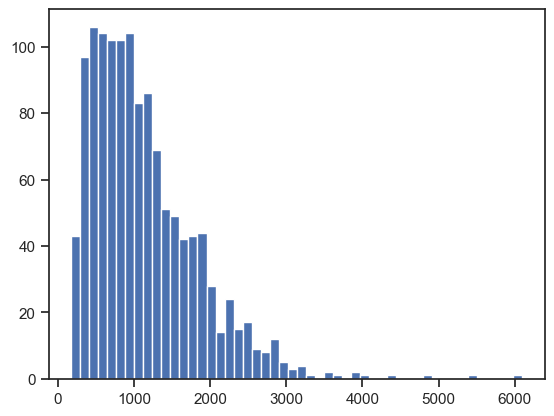

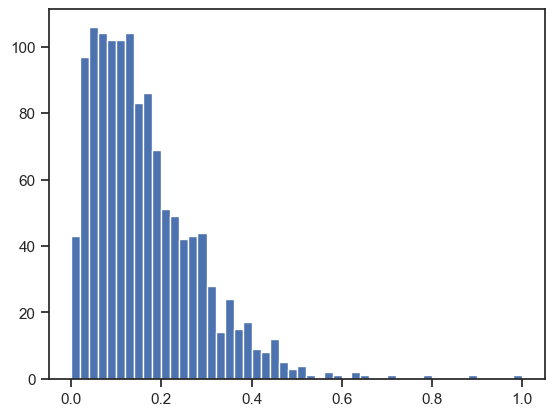

In [50]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(dt2[['Price (Euro)']])
plt.hist(dt2['Price (Euro)'], 50)
plt.show()

plt.hist(sc1_data, 50)
plt.show()

##### Масштабирование данных на основе Z-оценки - StandardScaler

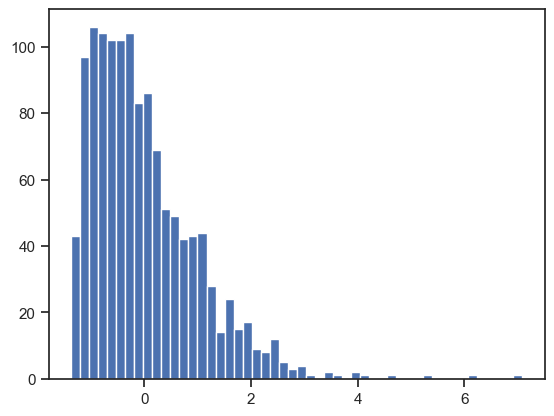

In [52]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(dt2[['Price (Euro)']])
plt.hist(sc2_data, 50)
plt.show()

##### MinMax масштабирование

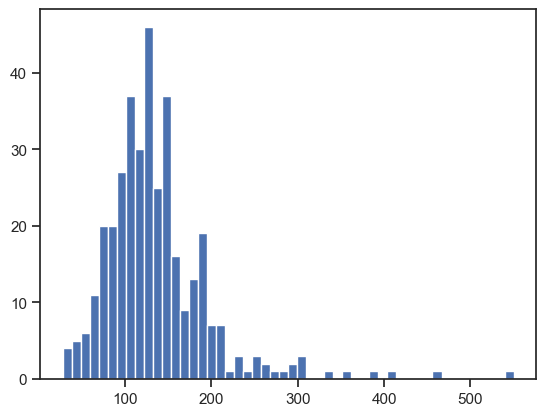

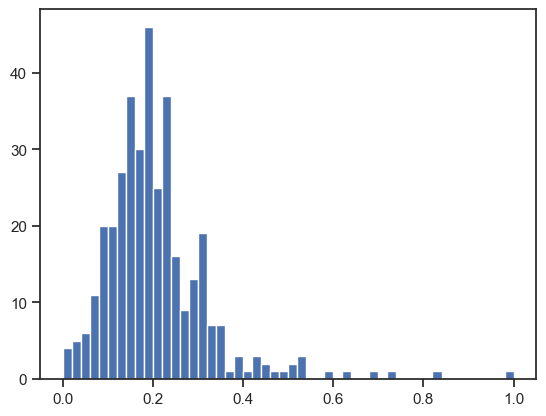

In [51]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(dt1[['LoanAmount']])
plt.hist(dt1['LoanAmount'], 50)
plt.show()

plt.hist(sc1_data, 50)
plt.show()

##### Масштабирование данных на основе Z-оценки - StandardScaler

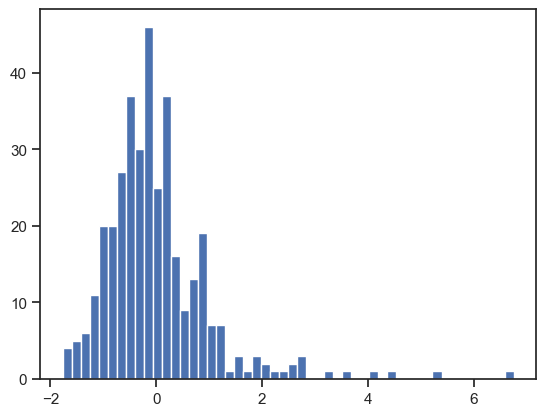

In [53]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(dt1[['LoanAmount']])
plt.hist(sc2_data, 50)
plt.show()